# Chargement et exploitation des données

In [2]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
%matplotlib inline

In [3]:
#chargement des données
Boston_Data = pd.read_csv('Boston_Data.csv',header=0)

Après chargement de la base de donnée, on la visualise pour mieux le comprendre

In [7]:
Boston_Data.head(3)

,Unnamed: 0,R1,R2,R3,R4,R5,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,Y
0,0,-0.21,0.11,-0.65,-0.54,1.48,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,1,0.08,-0.61,-0.85,-0.36,-0.12,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,2,-1.32,0.95,-0.75,-0.99,-0.36,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7


Avant de commencer le traitement nous vérifions s'il y'a pas de valeurs null

In [10]:
Boston_Data.isnull().sum()
#Rendu : Pas de valeurs nulles

### Création du modèle

<AxesSubplot:>

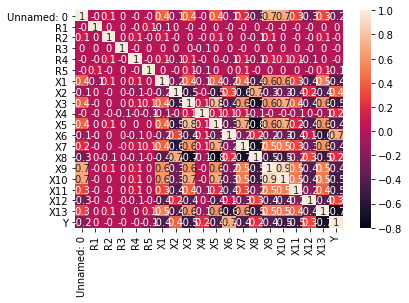

In [5]:
#etude de la correlation
matrice_corr = Boston_Data.corr().round(1)
sns.heatmap(data=matrice_corr, annot=True)

In [35]:
# Y variable expliquée
# X variable explicative.
# On remarque que Y a une forte corrélation avec les variables X13(-0.7), X6(0.7), X10(-0.5), X11(-0.5), X3(0.5)

### On divise notre jeu de données en 2 parties (75%, pour l’apprentissage et les 25% restant pour le test

In [6]:
X = Boston_Data.drop(['Unnamed: 0','Y'],axis=1)
Y = Boston_Data['Y']

#base d'apprentissage et base de test
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(379, 18)
(127, 18)
(379,)
(127,)


In [8]:
scaler = StandardScaler()
X_train_n = scaler.fit_transform(X_train)
X_test_n = scaler.transform(X_test)

********************

# Régression linéaire multiple

### Entrainement du modèle

In [9]:
#entrainement du modèle
model = LinearRegression()
model.fit(X_train_n, Y_train)

LinearRegression()

### Évaluation du modèle de régression linéaire

On utilise deux métriques pour l’évaluation L’erreur quadratique moyenne (l’erreur d’estimation) et le R-square (la qualité du modèle de régression)

In [10]:
# Evaluation du training set
y_train_predict = model.predict(X_train_n)
error = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
score = r2_score(Y_train, y_train_predict)

print('La performance du modèle sur la base dapprentissage')
print('--------------------------------------')
print('Lerreur quadratique moyenne est {}'.format(error))
print('le score R2 est {}'.format(score))
print('\n')
 
# model evaluation du testing set
y_test_predict = model.predict(X_test_n)
error = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
score = r2_score(Y_test, y_test_predict)
 
print('La performance du modèle sur la base de test')
print('--------------------------------------')
print('Lerreur quadratique moyenne est {}'.format(error))
print('le score R2 est {}'.format(score))

La performance du modèle sur la base dapprentissage
--------------------------------------
Lerreur quadratique moyenne est 4.696865016589693
le score R2 est 0.7512391717977318


La performance du modèle sur la base de test
--------------------------------------
Lerreur quadratique moyenne est 4.728195753598606
le score R2 est 0.68075471998808


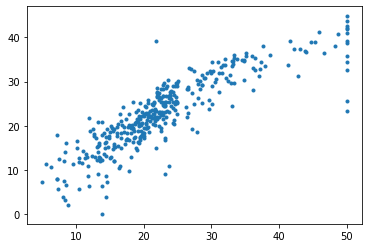

In [11]:
plt.plot(Y_train, y_train_predict,'.')
plt.show()

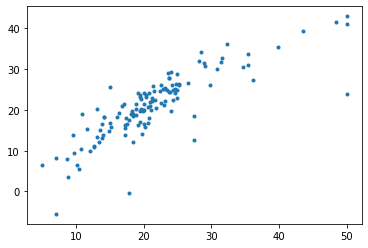

In [12]:
plt.plot(Y_test, y_test_predict,'.')
plt.show()

**********

# Méthode de sélection de variable pas-à-pas descendante

In [13]:
Boston_Data.drop(['Unnamed: 0','Y'],axis=1).columns

Index(['R1', 'R2', 'R3', 'R4', 'R5', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7',
       'X8', 'X9', 'X10', 'X11', 'X12', 'X13'],
      dtype='object')

In [14]:
Xppd_train_n = pd.DataFrame(np.c_[X_train_n], columns = Boston_Data.drop(['Unnamed: 0','Y'],axis=1).columns)

In [15]:
type(Xppd_train_n)

pandas.core.frame.DataFrame

#### Ajout de la colonne " const " constituer de 1

In [16]:
Xppd_train_n=sm.tools.tools.add_constant(Xppd_train_n , prepend=True , has_constant='skip')

In [17]:
Xppd_train_n

,const,R1,R2,R3,R4,R5,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13
0,1.0,-1.692906,0.245167,-0.393282,1.390237,1.175517,-0.406795,-0.502812,-1.247076,-0.287849,-0.591174,1.156255,0.833235,-0.503753,-0.740571,-1.280208,-0.205157,0.404512,-1.077756
1,1.0,1.132752,0.867318,0.046312,-0.403390,0.173093,0.007992,-0.502812,1.218283,3.474042,2.628380,-0.238475,0.486246,-0.956440,-0.507741,-0.013937,-1.576252,-3.098037,0.351165
2,1.0,0.478280,1.375407,0.035846,0.100764,-0.630738,-0.413450,0.364381,-1.121792,-0.287849,-0.970291,2.080976,-0.167973,0.441388,-0.507741,-1.141522,-1.487795,0.326591,-1.226252
3,1.0,1.080810,-0.615475,-0.403748,1.516275,0.608107,-0.371107,-0.502812,2.092391,-0.287849,0.190598,-0.987986,0.956127,-0.950895,-0.856986,-1.310358,0.369819,0.005983,2.065870
4,1.0,-0.134639,-1.019873,2.139618,-0.636077,-1.585879,-0.409661,-0.502812,-1.134753,-0.287849,-0.826546,0.013216,-1.877617,0.687804,-0.624156,0.148869,-0.603217,0.188141,-0.724729
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374,1.0,-0.082696,-1.144303,0.684771,-1.450481,-0.082242,-0.397140,-0.502812,-0.368648,-0.287849,-0.322177,-0.677892,0.822392,-0.735808,-0.507741,-0.128504,1.165939,0.422247,0.861093
375,1.0,0.924983,0.608088,-1.115473,-0.083446,-0.252465,-0.381729,0.364381,-0.599055,-0.287849,-0.792921,-0.650081,-0.977614,0.315455,-0.740571,-1.099312,0.148674,0.341924,0.068182
376,1.0,0.353618,0.670303,-0.874742,-0.102836,-0.091699,-0.415951,2.965961,-1.311878,-0.287849,-1.036700,0.433164,-1.425808,2.171042,-0.624156,-0.755610,-0.558988,0.368126,-0.913851
377,1.0,-1.007268,-1.393164,1.448827,0.537052,0.069067,0.926381,-0.502812,1.005156,-0.287849,1.527175,0.424821,0.919983,-0.776711,1.704142,1.571917,0.856337,-2.848141,1.506909


#### instanciation et détails

In [18]:
reg = sm.OLS(np.array(Y_train), Xppd_train_n.drop(['R3','X7','X3','R1','R2','R5','R4','X2','X10'],axis=1)).fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.743
Model:                            OLS   Adj. R-squared:                  0.737
Method:                 Least Squares   F-statistic:                     118.6
Date:                Tue, 02 Mar 2021   Prob (F-statistic):          3.51e-103
Time:                        12:37:17   Log-Likelihood:                -1130.2
No. Observations:                 379   AIC:                             2280.
Df Residuals:                     369   BIC:                             2320.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.9079      0.248     92.188      0.0

#### Évaluation du modèle de régression linéaire

In [19]:
Xppd_train_n = Xppd_train_n.drop(['R3','R2','R5','X7','X3','R4','R1','X10','X2'],axis=1)

In [20]:
Xppd_train_n

,const,X1,X4,X5,X6,X8,X9,X11,X12,X13
0,1.0,-0.406795,-0.287849,-0.591174,1.156255,-0.503753,-0.740571,-0.205157,0.404512,-1.077756
1,1.0,0.007992,3.474042,2.628380,-0.238475,-0.956440,-0.507741,-1.576252,-3.098037,0.351165
2,1.0,-0.413450,-0.287849,-0.970291,2.080976,0.441388,-0.507741,-1.487795,0.326591,-1.226252
3,1.0,-0.371107,-0.287849,0.190598,-0.987986,-0.950895,-0.856986,0.369819,0.005983,2.065870
4,1.0,-0.409661,-0.287849,-0.826546,0.013216,0.687804,-0.624156,-0.603217,0.188141,-0.724729
...,...,...,...,...,...,...,...,...,...,...
374,1.0,-0.397140,-0.287849,-0.322177,-0.677892,-0.735808,-0.507741,1.165939,0.422247,0.861093
375,1.0,-0.381729,-0.287849,-0.792921,-0.650081,0.315455,-0.740571,0.148674,0.341924,0.068182
376,1.0,-0.415951,-0.287849,-1.036700,0.433164,2.171042,-0.624156,-0.558988,0.368126,-0.913851
377,1.0,0.926381,-0.287849,1.527175,0.424821,-0.776711,1.704142,0.856337,-2.848141,1.506909


In [21]:
Xppd_test_n = pd.DataFrame(X_test_n, columns = Boston_Data.drop(['Unnamed: 0','Y'],axis=1).columns)

In [22]:
type(Xppd_test_n)

pandas.core.frame.DataFrame

In [23]:
Xppd_test_n = Xppd_test_n.drop(['R3','R2','R5','X7','X3','R4','R1','X10','X2'],axis=1)

In [24]:
Xppd_test_n=sm.tools.tools.add_constant(Xppd_test_n , prepend=True , has_constant='skip')

In [25]:
Xppd_test_n

,const,X1,X4,X5,X6,X8,X9,X11,X12,X13
0,1.0,-0.406705,-0.287849,-0.406239,0.128632,-0.529489,-0.507741,-0.735903,0.420302,-0.486575
1,1.0,-0.410961,3.474042,-0.935826,0.604203,0.148902,-0.624156,-0.293614,0.436321,-1.258473
2,1.0,-0.405024,-0.287849,0.425970,-0.473480,-0.898332,-0.624156,0.812108,0.358629,0.778440
3,1.0,-0.406722,-0.287849,-1.221635,-0.359454,0.722262,-0.624156,0.414048,0.367783,-0.979693
4,1.0,0.195293,-0.287849,1.300209,-0.036844,-0.661300,1.704142,0.856337,0.301190,0.666368
...,...,...,...,...,...,...,...,...,...,...
122,1.0,8.438563,-0.287849,1.014400,-0.509634,-0.929377,1.704142,0.856337,-3.916836,1.135670
123,1.0,-0.399575,-0.287849,-0.095211,-0.420638,-0.481571,-0.391326,-0.205157,0.408975,-0.310062
124,1.0,-0.400717,-0.287849,-0.927420,-0.214836,0.927775,-0.740571,-0.160928,0.281509,-0.939067
125,1.0,-0.375468,-0.287849,-0.549143,-0.392827,0.453901,-0.507741,0.590963,0.436321,-0.674296


On utilise deux métriques pour l’évaluation L’erreur quadratique moyenne (l’erreur d’estimation) et le R-square (la qualité du modèle de régression)

In [27]:
# Evaluation du training set
y_train_predict = reg.predict(Xppd_train_n)
error = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
score = r2_score(Y_train, y_train_predict)

print('La performance du modèle sur la base dapprentissage')
print('--------------------------------------')
print('Lerreur quadratique moyenne est {}'.format(error))
print('le score R2 est {}'.format(score))
print('\n')

# model evaluation du testing set
y_test_predict = reg.predict(Xppd_test_n)
error = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
score = r2_score(Y_test, y_test_predict)
 
print('La performance du modèle sur la base de test')
print('--------------------------------------')
print('Lerreur quadratique moyenne est {}'.format(error))
print('le score R2 est {}'.format(score))

La performance du modèle sur la base dapprentissage
--------------------------------------
Lerreur quadratique moyenne est 4.773336192339393
le score R2 est 0.7430729191945766


La performance du modèle sur la base de test
--------------------------------------
Lerreur quadratique moyenne est 4.877032909593132
le score R2 est 0.6603395660591358


*******************

# régression Ridge 

#### Recherche de la meilleure valeur alpha

In [29]:
from sklearn.linear_model import RidgeCV
import matplotlib.pyplot as plt

# a est un hyperparamètre que nous sommes en train de régler, listant les options
a = np.arange(0.01,30,0.1)

cross_validating_ridge = RidgeCV(alphas=a, store_cv_values=True)
cross_validating_ridge.fit(X_train_n, Y_train)

# recherche d'erreurs quadratiques moyennes
cv_rmse = np.sqrt(np.mean(cross_validating_ridge.cv_values_, axis=0))


print("best alpha: ", cross_validating_ridge.alpha_)

best alpha:  9.31


In [30]:
# Créer une régression de Ridge avec une valeur alpha
regr = Ridge(alpha=9.31, fit_intercept=True)
# Ajuster la régression linéaire
model = regr.fit(X_train_n, Y_train)

On utilise deux métriques pour l’évaluation L’erreur quadratique moyenne (l’erreur d’estimation) et le R-square (la qualité du modèle de régression)

In [31]:
# Evaluation du training set
y_train_predict = model.predict(X_train_n)
error = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
score = r2_score(Y_train, y_train_predict)

print('La performance du modèle sur la base dapprentissage')
print('--------------------------------------')
print('Lerreur quadratique moyenne est {}'.format(error))
print('le score R2 est {}'.format(score))
print('\n')

# model evaluation du testing set
y_test_predict = model.predict(X_test_n)
error = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
score = r2_score(Y_test, y_test_predict)
 
print('La performance du modèle sur la base de test')
print('--------------------------------------')
print('Lerreur quadratique moyenne est {}'.format(error))
print('le score R2 est {}'.format(score))

La performance du modèle sur la base dapprentissage
--------------------------------------
Lerreur quadratique moyenne est 4.705699127056492
le score R2 est 0.750302526911862


La performance du modèle sur la base de test
--------------------------------------
Lerreur quadratique moyenne est 4.751779237754588
le score R2 est 0.6775620888404865


**********************

# Régression LASSO

In [33]:
from sklearn.linear_model import LassoCV
#obtention des valeurs des coefs. corresp.
from sklearn.linear_model import lasso_path

my_alphas = np.array([0.001,0.01,0.02,0.025,0.05,0.1,0.25,0.5,0.8,1.0,1.001,1.01,1.02,1.05,2])
#my_alphas = np.arange(0.01,30,0.1)

#outil pour la détection de la solution la plus performante en validation croisée
#random_state = 0 pour fixer l’initialisation du générateur de nombre aléatoire
#cv = 5 pour 5-fold validation croisée
lcv = LassoCV(alphas=my_alphas,normalize=False,fit_intercept=False,random_state=42,cv=5)

#lancement sur l'échantillon d'apprentissage
lcv.fit(X_train_n, Y_train)

LassoCV(alphas=array([1.000e-03, 1.000e-02, 2.000e-02, 2.500e-02, 5.000e-02, 1.000e-01,
       2.500e-01, 5.000e-01, 8.000e-01, 1.000e+00, 1.001e+00, 1.010e+00,
       1.020e+00, 1.050e+00, 2.000e+00]),
        cv=5, fit_intercept=False, random_state=42)

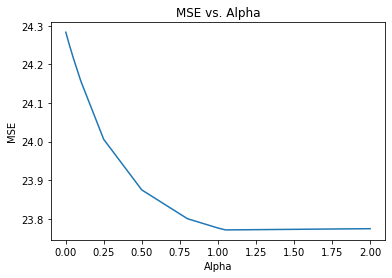

Meilleure alpha : 1.05


In [36]:
#moyenne mse en validation croisée pour chaque alpha
avg_rmse = np.sqrt(np.mean(lcv.mse_path_,axis=1))
#sous-forme graphique
plt.plot(lcv.alphas_,avg_rmse)
plt.xlabel('Alpha')
plt.ylabel('MSE')
plt.title('MSE vs. Alpha')
plt.show()
print("Meilleure alpha :",lcv.alpha_)

In [42]:
model = Lasso(alpha=1.05, fit_intercept=True)
model.fit(X_train_n, Y_train)

Lasso(alpha=1.05)

On utilise deux métriques pour l’évaluation L’erreur quadratique moyenne (l’erreur d’estimation) et le R-square (la qualité du modèle de régression)

In [43]:
# Evaluation du training set
y_train_predict = model.predict(X_train_n)
error = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
score = r2_score(Y_train, y_train_predict)

print('La performance du modèle sur la base dapprentissage')
print('--------------------------------------')
print('Lerreur quadratique moyenne est {}'.format(error))
print('le score R2 est {}'.format(score))
print('\n')

# model evaluation du testing set
y_test_predict = model.predict(X_test_n)
error = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
score = r2_score(Y_test, y_test_predict)
 
print('La performance du modèle sur la base de test')
print('--------------------------------------')
print('Lerreur quadratique moyenne est {}'.format(error))
print('le score R2 est {}'.format(score))

La performance du modèle sur la base dapprentissage
--------------------------------------
Lerreur quadratique moyenne est 5.366017142585634
le score R2 est 0.6753092268857508


La performance du modèle sur la base de test
--------------------------------------
Lerreur quadratique moyenne est 5.112991189326277
le score R2 est 0.6266779203334305


In [41]:
model.coef_

array([ 0.        , -0.        , -0.        ,  0.        , -0.        ,
       -0.29544932,  0.        , -0.        ,  0.44036194, -0.        ,
        3.24785174, -0.        , -0.25862304, -0.        , -0.        ,
       -1.47806623,  0.76246127, -3.67407282])